<a href="https://colab.research.google.com/github/a-proenca/LAD/blob/main/LAD_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instituto Politécnico de Coimbra
## Instituto Superior de Engenharia de Coimbra
## Mestrado em Engenharia Informática - Laboratório de Análise de Dados
## Elaborado por:

# André Proença - 2016018783

# Bruno Coutinho - 2014009997

#Imports

In [2]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#FUNCOES


In [4]:
def ler_emel():
    emel_filepath = '/content/drive/MyDrive/LAD_2023/EMEL'
    ficheiros = ['EMEL_CONDICIONAMENTOS_TRANSITO_2022.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(emel_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def ler_eixos_vodafone():
  #'PGIL_VODAFONE_EIXOS_2022_01.csv'
    #Nao incluimos fevereiro nem março tem dados em falta
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE EIXOS/PGIL_VODAFONE_EIXOS_2022'
    ficheiros = ['PGIL_VODAFONE_EIXOS_2022_04.csv','PGIL_VODAFONE_EIXOS_2022_05.csv','PGIL_VODAFONE_EIXOS_2022_06.csv','PGIL_VODAFONE_EIXOS_2022_07.csv','PGIL_VODAFONE_EIXOS_2022_08.csv','PGIL_VODAFONE_EIXOS_2022_09.csv','PGIL_VODAFONE_EIXOS_2022_10.csv','PGIL_VODAFONE_EIXOS_2022_11.csv','PGIL_VODAFONE_EIXOS_2022_12.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def ler_quadriculas_vodafone_bruto():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE_QUADRICULAS'
    ficheiros = ['VODAFONE_QUADRICULAS_BRUTO_UTF8.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def ler_grelhas_vodafone():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE GRELHA'
    ficheiros = ['grelhas_abril.csv', 'grelhas_maio.csv', 'grelhas_junho.csv', 'grelhas_julho.csv', 'grelhas_agosto.csv', 'grelhas_setembro.csv', 'grelhas_outubro.csv', 'grelhas_novembro.csv', 'grelhas_dezembro.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def ler_grelhas_vodafone_paco():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE GRELHA'
    ficheiros = ['grelhas_outubro_paco.csv', 'grelhas_novembro_paco.csv', 'grelhas_dezembro_paco.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result



def ler_waze():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/WAZE JAMS'
    ficheiros = ['waze_2022_ate_2022-07-18.csv','waze_2022_desde_2022-07-18.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def plot_outlier_detection(df, column_name):

    # boxplot
    plt.figure(figsize=(10, 6))
    df.boxplot(column=[column_name])
    plt.title(f'Boxplot para Detecção de Outliers em {column_name}')
    plt.ylabel('Valores')
    plt.show()

    # scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df[column_name])
    plt.title(f'Scatter Plot para Detecção de Outliers em {column_name}')
    plt.xlabel('Índice')
    plt.ylabel('Valores')

    # Calculando o limite superior e inferior para outliers (exemplo: 1.5*IQR)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    plt.hlines([limite_superior, limite_inferior], xmin=df.index.min(), xmax=df.index.max(), colors='r')
    plt.show()

def plot_histogram_with_count(df, x_column):
     # Hist
    sns.histplot(data=df, x=x_column, stat='count')
    plt.title(f'Histograma de Contagem para {x_column}')
    plt.xlabel(x_column)
    plt.ylabel('Contagem')
    plt.show()

#FUNCAO FOI USADA PREVIAMENTE PARA FILTRAR AS HORAS DE PONTA E TORNAR OS FICHEIROS MAIS
def filtrar_horas(df, coluna_datetime):
    """
    Filtra um DataFrame para manter apenas as linhas onde os horários em 'coluna_datetime'
    estão entre 7-10 da manhã e 17-20h.

    Parâmetros:
    df (pandas.DataFrame): DataFrame a ser filtrado.
    coluna_datetime (str): Nome da coluna que contém os dados de data e hora.

    Retorna:
    pandas.DataFrame: DataFrame filtrado.
    """
    # Garantir que a coluna Datetime está no formato correto
    df[coluna_datetime] = pd.to_datetime(df[coluna_datetime])

    # Filtrar para manter as horas entre 7-10 da manhã e 17-20h
    df_filtrado = df[((df[coluna_datetime].dt.hour >= 7) & (df[coluna_datetime].dt.hour < 10)) |
                     ((df[coluna_datetime].dt.hour >= 17) & (df[coluna_datetime].dt.hour < 20))]

    return df_filtrado

def month_to_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    elif month in [12, 1, 2]:
        return 'Winter'
    else:
        return None


In [5]:
data_vodafone_eixos = ler_eixos_vodafone()

In [21]:
data_vodafone_eixos

,id_eixo_viario,Eixo,Datetime,C12,C13
0,1,Ponte 25 Abril,2022-04-01T00:00:00.000Z,2.050000,7.070000
1,1,Ponte 25 Abril,2022-04-01T00:15:00.000Z,8.460000,19.400000
2,1,Ponte 25 Abril,2022-04-01T00:30:00.000Z,13.430000,13.430000
3,1,Ponte 25 Abril,2022-04-01T00:45:00.000Z,7.560000,7.560000
4,1,Ponte 25 Abril,2022-04-01T01:00:00.000Z,0.000000,0.000000
...,...,...,...,...,...
283701,11,IC2 (Sacavém),2022-12-31T22:45:00.000Z,54.040001,38.009998
283702,11,IC2 (Sacavém),2022-12-31T23:00:00.000Z,9.320000,11.220000
283703,11,IC2 (Sacavém),2022-12-31T23:15:00.000Z,1.260000,6.720000
283704,11,IC2 (Sacavém),2022-12-31T23:30:00.000Z,0.000000,0.000000


In [6]:
#converter valores em datetime
data_vodafone_eixos = data_vodafone_eixos.drop(columns='id_eixo_viario')
data_vodafone_eixos['Datetime'] = pd.to_datetime(data_vodafone_eixos['Datetime'], format='%Y.%m.%d %H:%M:%S')
data_vodafone_eixos = filtrar_horas(data_vodafone_eixos, 'Datetime')

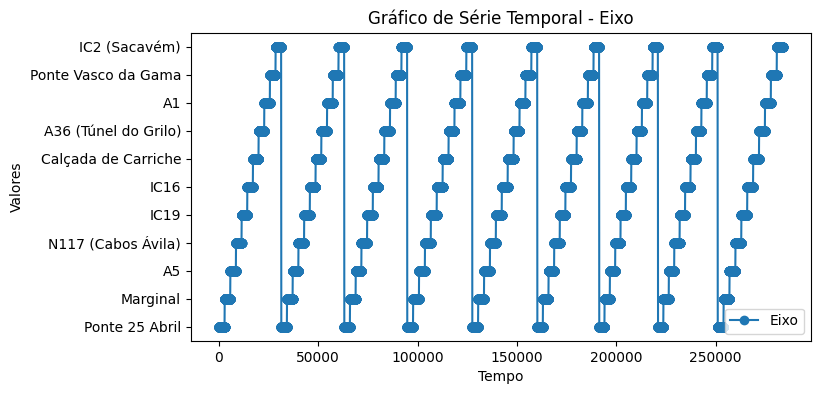

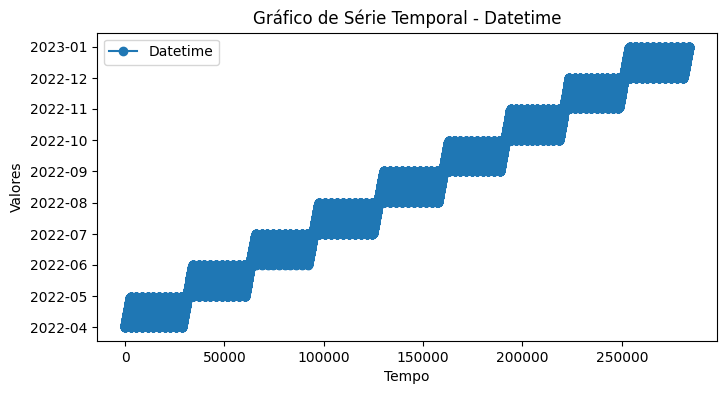

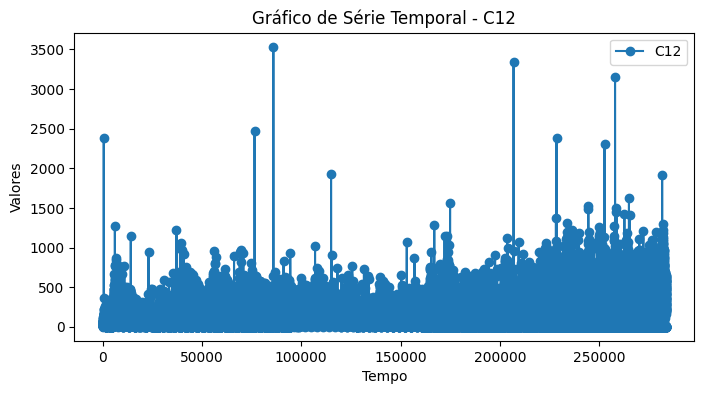

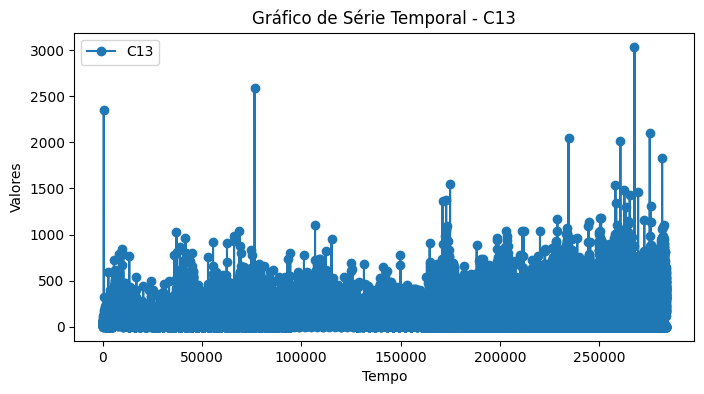

In [23]:
for column in data_vodafone_eixos.columns:
    plt.figure(figsize=(8, 4))
    plt.plot(data_vodafone_eixos.index, data_vodafone_eixos[column], marker='o', linestyle='-', label=column)
    plt.title(f'Gráfico de Série Temporal - {column}')
    plt.xlabel('Tempo')
    plt.ylabel('Valores')
    plt.legend()
    plt.show()

In [7]:
df = data_vodafone_eixos

In [8]:
df = df.drop('Eixo', axis=1)
df=df.set_index('Datetime')

In [9]:
df['Seconds'] = df.index.map(pd.Timestamp.timestamp)
#Create sin and cos based on time

day = 60*60*24
year = 365.2425*day

df['Day sin'] = np.sin(df['Seconds']* (2*np.pi / day))
df['Day cos'] = np.cos(df['Seconds']* (2*np.pi / day))
df['Year sin'] = np.sin(df['Seconds']* (2*np.pi / day))
df['Year cos'] = np.cos(df['Seconds']* (2*np.pi / day))

df = df = df.drop('Seconds', axis=1)

In [12]:
df

,C12,C13,Day sin,Day cos,Year sin,Year cos
Datetime,,,,,,
2022-04-01 07:00:00+00:00,43.970001,28.900000,0.965926,-0.258819,0.965926,-0.258819
2022-04-01 07:15:00+00:00,39.820000,31.320000,0.946930,-0.321439,0.946930,-0.321439
2022-04-01 07:30:00+00:00,96.309998,58.720001,0.923880,-0.382683,0.923880,-0.382683
2022-04-01 07:45:00+00:00,55.790001,29.459999,0.896873,-0.442289,0.896873,-0.442289
2022-04-01 08:00:00+00:00,69.180000,25.959999,0.866025,-0.500000,0.866025,-0.500000
...,...,...,...,...,...,...
2022-12-31 18:45:00+00:00,232.360001,239.389999,-0.980785,0.195090,-0.980785,0.195090
2022-12-31 19:00:00+00:00,195.490005,120.790001,-0.965926,0.258819,-0.965926,0.258819
2022-12-31 19:15:00+00:00,219.899994,211.419998,-0.946930,0.321439,-0.946930,0.321439


In [10]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions(model, X, y, start=0, end=100):
  predictions(model.predict(X).flatten())
  df = pd.Dataframe(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y,predictions)


In [14]:
def df_to_X_y(df, window_size):
  #window size é o numero de intervalos que queremos mostrar
  df_as_np = df.to_numpy()
  X = []
  Y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][1] #predict a c13
    Y.append(label)
  return np.array(X), np.array(Y)

In [15]:
X, Y = df_to_X_y(df,384)
X.shape , Y.shape

((70445, 384, 6), (70445,))

In [16]:
#Train 80% , Test 10% Validation 10%

from sklearn.model_selection import train_test_split

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

X_train.shape,Y_train.shape,X_val.shape,Y_val.shape,X_test.shape,Y_test.shape

#Stardarization
c12_train_mean = np.mean(X_train[:, :, 0])
c12_train_std = np.std(X_train[:, :, 0])
c13_train_mean = np.mean(X_train[:, :, 1])
c13_train_std = np.std(X_train[:, :, 1])


In [52]:
def preprocess_c12(X):
  X[:, :, 0] = (X[:, :, 0] - c12_train_mean) / c12_train_std

def preprocess_c13(X):
  X[:, :, 1] = (X[:, :, 1] - c13_train_mean) / c13_train_std

In [34]:
preprocess_c12(X_train)
preprocess_c12(X_val)
preprocess_c12(X_test)
preprocess_c13(X_train)
preprocess_c13(X_val)
preprocess_c13(X_test)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam



model = Sequential()
model.add(InputLayer((384,6)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                18176     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18705 (73.07 KB)
Trainable params: 18705 (73.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
#cp = ModelCheckpoint('model/', save_best_only=True)
#model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [ ]:
#model.fit(X_train,Y_train,validation_data=(X_val,Y_val), epochs=10, callbacks=[cp])

In [ ]:
#plot_predictions(model,x_test,y_test)

In [ ]:
##PREDICT C12 AND C13 AT THE SAME TIME

In [12]:
def df_to_X_y_v2(df, window_size):
  #window size é o numero de intervalos que queremos mostrar
  df_as_np = df.to_numpy()
  X = []
  Y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0], df_as_np[i+window_size][1]  #predict a c12 e c13
    Y.append(label)
  return np.array(X), np.array(Y)

In [14]:
X_v2 , y_v2 = df_to_X_y_v2(df,672)
X_v2.shape , y_v2.shape

#TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

X_trainV2, X_temp, Y_trainV2, Y_temp = train_test_split(X_v2, y_v2, test_size=0.2, random_state=42)
X_testV2, X_valV2, Y_testV2, Y_valV2 = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

X_trainV2.shape,Y_trainV2.shape,X_valV2.shape,Y_valV2.shape,X_testV2.shape,Y_testV2.shape


((56125, 672, 6),
 (56125, 2),
 (7016, 672, 6),
 (7016, 2),
 (7016, 672, 6),
 (7016, 2))

In [15]:
c12_train_mean = np.mean(X_trainV2[:, :, 0])
c12_train_std = np.std(X_trainV2[:, :, 0])
c13_train_mean = np.mean(X_trainV2[:, :, 1])
c13_train_std = np.std(X_trainV2[:, :, 1])

def preprocessv2(X):
  X[:, :, 0] = (X[:, :, 0] - c12_train_mean) / c12_train_std
  X[:, :, 1] = (X[:, :, 1] - c13_train_mean) / c13_train_std
  return X


def preprocess_outputv2(y):
  y[:, 0] = (y[:, 0] - c12_train_mean) / c12_train_std
  y[:, 1] = (y[:, 1] - c13_train_mean) / c13_train_std
  return y





In [16]:
preprocessv2(X_trainV2)
preprocessv2(X_testV2)
preprocessv2(X_valV2)

preprocess_outputv2(Y_trainV2)
preprocess_outputv2(Y_testV2)
preprocess_outputv2(Y_valV2)

array([[ 1.51008901,  1.15272623],
       [-0.17516846, -0.45445834],
       [ 0.65244405,  0.19888243],
       ...,
       [-0.31596562, -0.43430815],
       [-1.07008886, -1.09485539],
       [ 0.88764698,  1.57147164]])

In [17]:
##SHAPEFILES IN PYTHON VIA GEOPANDAS (DEPOIS É PARA PASSAR PARA CIMA)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model2 = Sequential()
model2.add(InputLayer((672,6)))
model2.add(LSTM(64))
model2.add(Dense(8, 'relu'))
model2.add(Dense(2, 'linear'))

model2.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18176     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18714 (73.10 KB)
Trainable params: 18714 (73.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
model2.fit(X_trainV2, Y_trainV2, validation_data=(X_valV2,Y_valV2), epochs=10, callbacks=cp2)

Epoch 1/10
1754/1754 [==============================] - 54s 28ms/step - loss: 0.3847 - val_loss: 0.3444
Epoch 2/10
1754/1754 [==============================] - 46s 26ms/step - loss: 0.3507 - val_loss: 0.3320
Epoch 3/10
1754/1754 [==============================] - 48s 27ms/step - loss: 0.3391 - val_loss: 0.3266
Epoch 4/10
1754/1754 [==============================] - 49s 28ms/step - loss: 0.3296 - val_loss: 0.3185
Epoch 5/10
1754/1754 [==============================] - 45s 26ms/step - loss: 0.3232 - val_loss: 0.3123
Epoch 6/10
1754/1754 [==============================] - 69s 40ms/step - loss: 0.3198 - val_loss: 0.3014
Epoch 7/10
1754/1754 [==============================] - 56s 32ms/step - loss: 0.3126 - val_loss: 0.3040
Epoch 8/10
1754/1754 [==============================] - 50s 28ms/step - loss: 0.3081 - val_loss: 0.3059
Epoch 9/10
1754/1754 [==============================] - 52s 30ms/step - loss: 0.3040 - val_loss: 0.3069
Epoch 10/10
1754/1754 [==============================] - 68s 39m

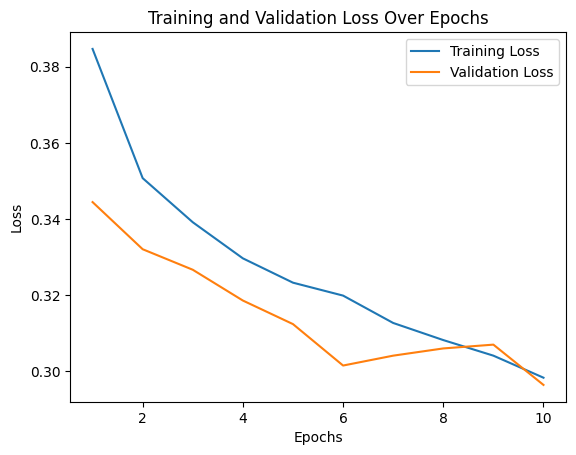

In [48]:
epochs = range(1, 11)

training_loss = [0.3847, 0.3507, 0.3391, 0.3296, 0.3232, 0.3198, 0.3126, 0.3081, 0.3040, 0.2982]
validation_loss = [0.3444, 0.3320, 0.3266, 0.3185, 0.3123, 0.3014, 0.3040, 0.3059, 0.3069, 0.2963]

plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [37]:
def plot_predictions2(model, X, Y, start=0, end=100):
    predictions = model.predict(X)
    c12_preds, c13_preds = predictions[:, 0], predictions[:, 1]
    c12_actuals, c13_actuals = Y[:, 0], Y[:, 1]

    df = pd.DataFrame(data={'C12 Predictions': c12_preds,
                            'C12 Actuals': c12_actuals,
                            'C13 Predictions': c13_preds,
                            'C13 Actuals': c13_actuals
                            })

    plt.plot(df['C12 Predictions'][start:end], label='Predictions de Entradas(C12)')
    plt.plot(df['C12 Actuals'][start:end], label='Actuals de Entradas(C12)')
    plt.plot(df['C13 Predictions'][start:end], label='Predictions de Entradas(C13)')
    plt.plot(df['C13 Actuals'][start:end], label='Actuals de Entradas(C13)')
    plt.legend()

    return df[start:end]


220/220 [==============================] - 2s 10ms/step


,C12 Predictions,C12 Actuals,C13 Predictions,C13 Actuals
0,3.141703,3.834460,2.768663,2.220335
1,-0.659189,-0.818590,-0.720242,-0.816741
2,-0.817446,-0.825707,-0.872374,-0.944919
3,-0.609813,-0.280064,-0.631043,-0.417237
4,-0.649165,-0.427854,-0.625948,-0.595230
...,...,...,...,...
95,0.615447,0.581015,0.505827,-0.101551
96,-0.429259,-0.501406,-0.255988,-1.003620
97,0.127790,-0.231362,0.379091,-0.153465
98,-0.394918,0.101618,-0.247576,-0.367001


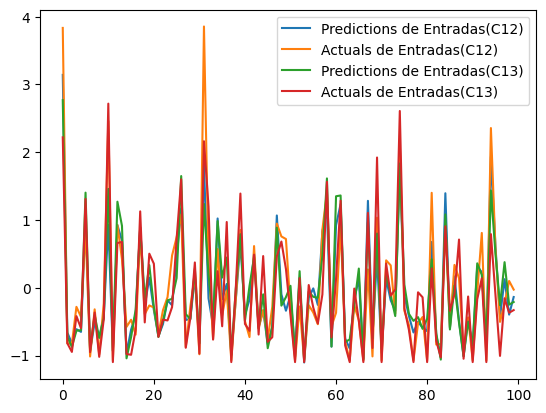

In [38]:
plot_predictions2(model2,X_testV2,Y_testV2)

In [43]:
def postprocess_c12(arr):
  arr = (arr*c12_train_std) + c12_train_mean
  return arr

def postprocess_c13(arr):
  arr = (arr*c13_train_std) + c13_train_mean
  return arr

In [56]:
def plot_predictions2_processed(model, X, Y, start=0, end=100):
    predictions = model.predict(X)
    c12_preds, c13_preds = postprocess_c12(predictions[:, 0]), postprocess_c13(predictions[:, 1])
    c12_actuals, c13_actuals =postprocess_c12(Y[:, 0]), postprocess_c13(Y[:, 1])

    df = pd.DataFrame(data={'C12 Predictions': c12_preds,
                            'C12 Actuals': c12_actuals,
                            'C13 Predictions': c13_preds,
                            'C13 Actuals': c13_actuals
                            })

    plt.plot(df['C12 Predictions'][start:end], label='Predictions de Entradas(C12)')
    plt.plot(df['C12 Actuals'][start:end], label='Actuals de Entradas(C12)')
    plt.plot(df['C13 Predictions'][start:end], label='Predictions de Saidas(C13)')
    plt.plot(df['C13 Actuals'][start:end], label='Actuals de Saidas(C13)')
    plt.legend()

    return df[start:end]

220/220 [==============================] - 2s 10ms/step


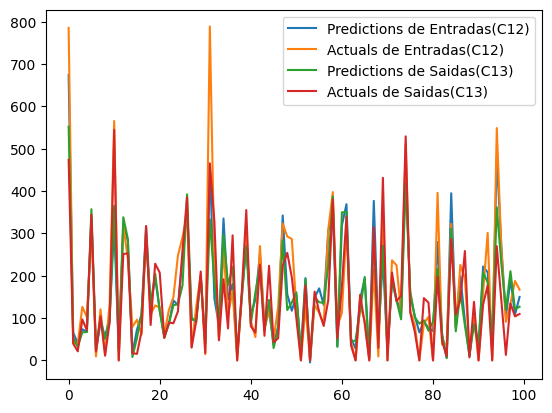

In [57]:
plot_preds_df = plot_predictions2_processed(model2,X_testV2,Y_testV2)

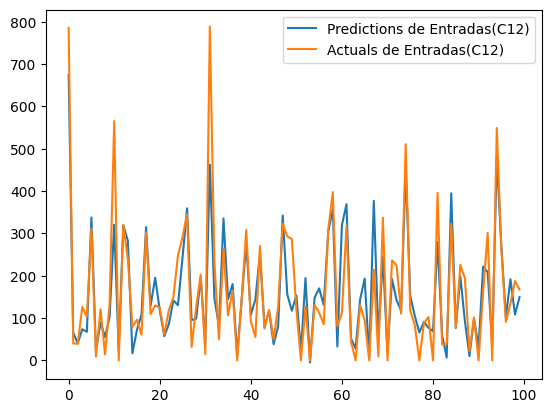

In [58]:
start, end = 0, 100
plt.plot(plot_preds_df['C12 Predictions'][start:end], label='Predictions de Entradas(C12)')
plt.plot(plot_preds_df['C12 Actuals'][start:end], label='Actuals de Entradas(C12)')
plt.legend()

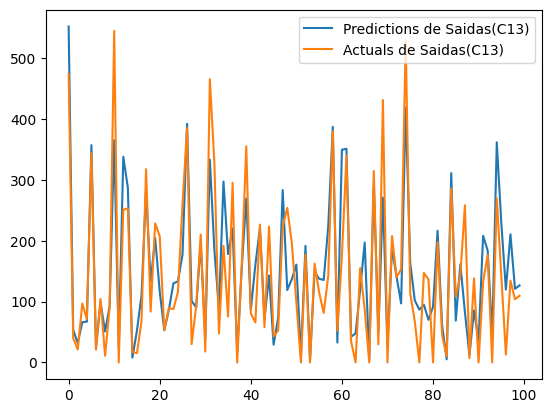

In [60]:
plt.plot(plot_preds_df['C13 Predictions'][start:end],label='Predictions de Saidas(C13)')
plt.plot(plot_preds_df['C13 Actuals'][start:end], label='Actuals de Saidas(C13)')
plt.legend()